In [2]:
import pandas as pd
df = pd.read_csv("loan-train.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df = df.drop(['Loan_ID','CoapplicantIncome','Gender'],axis=1)
df.head(10)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,No,5849,NaN,360.0,1.0,Urban,Y
1,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
5,Yes,2,Graduate,Yes,5417,267.0,360.0,1.0,Urban,Y
6,Yes,0,Not Graduate,No,2333,95.0,360.0,1.0,Urban,Y
7,Yes,3+,Graduate,No,3036,158.0,360.0,0.0,Semiurban,N
8,Yes,2,Graduate,No,4006,168.0,360.0,1.0,Urban,Y
9,Yes,1,Graduate,No,12841,349.0,360.0,1.0,Semiurban,N


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df.head(10)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,5849,NaN,360.0,1.0,2,1
1,1,1,0,0,4583,128.0,360.0,1.0,0,0
2,1,0,0,1,3000,66.0,360.0,1.0,2,1
3,1,0,1,0,2583,120.0,360.0,1.0,2,1
4,0,0,0,0,6000,141.0,360.0,1.0,2,1
5,1,2,0,1,5417,267.0,360.0,1.0,2,1
6,1,0,1,0,2333,95.0,360.0,1.0,2,1
7,1,3+,0,0,3036,158.0,360.0,0.0,1,0
8,1,2,0,0,4006,168.0,360.0,1.0,2,1
9,1,1,0,0,12841,349.0,360.0,1.0,1,0


In [5]:
df.isnull().sum()

Married              0
Dependents          15
Education            0
Self_Employed        0
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
df1 = df.dropna(subset=['LoanAmount'])
df1.isnull().sum()

Married              0
Dependents          13
Education            0
Self_Employed        0
ApplicantIncome      0
LoanAmount           0
Loan_Amount_Term    14
Credit_History      49
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df1['Credit_History'].unique()
df1['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [17]:
from sklearn.impute import SimpleImputer
import numpy as np
import warnings
warnings.filterwarnings('ignore')
imputer= SimpleImputer(missing_values=np.nan,strategy='most_frequent')
im1=imputer.fit(df1['Credit_History'].values.reshape(-1,1))
df1['Credit_History'] = im1.transform(df1['Credit_History'].values.reshape(-1,1))
im2 = imputer.fit(df1['Dependents'].values.reshape(-1,1))
df1['Dependents'] = im2.transform(df1['Dependents'].values.reshape(-1,1))
im3 = imputer.fit(df1['Loan_Amount_Term'].values.reshape(-1,1))
df1['Loan_Amount_Term'] = im3.transform(df1['Loan_Amount_Term'].values.reshape(-1,1))

In [19]:
df1.isnull().sum()

Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

In [21]:
x = df1.drop(['Loan_Status'],axis=1)
y=df1['Loan_Status']
x.head(5)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,0,0,4583,128.0,360.0,1.0,0
2,1,0,0,1,3000,66.0,360.0,1.0,2
3,1,0,1,0,2583,120.0,360.0,1.0,2
4,0,0,0,0,6000,141.0,360.0,1.0,2
5,1,2,0,1,5417,267.0,360.0,1.0,2


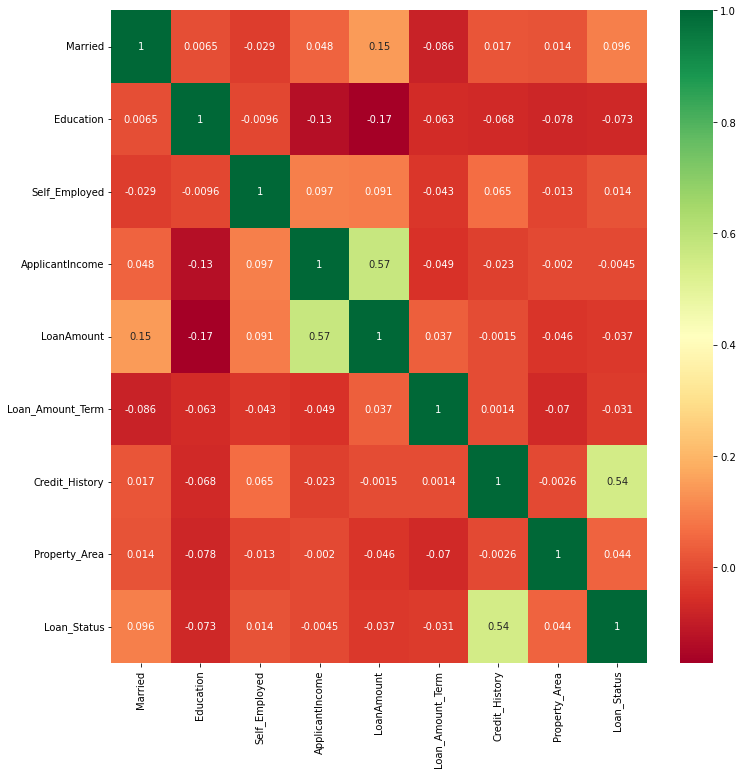

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
g = sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Since Loan_status is highly correlated to Credit_History,so we take Credit_History for prediction

In [50]:
from sklearn.model_selection import train_test_split
x1=df1['Credit_History'].values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.3,random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(random_state=0)
cls.fit(x_train,y_train)
y_pred = cls.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 28,  29],
       [  2, 119]], dtype=int64)

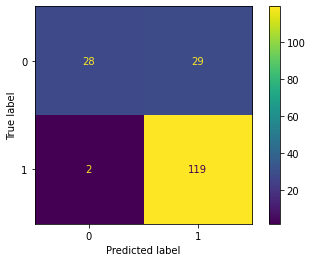

In [53]:
plot_confusion_matrix(cls,x_test,y_test)
plt.show()

In [54]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.49      0.64        57
           1       0.80      0.98      0.88       121

    accuracy                           0.83       178
   macro avg       0.87      0.74      0.76       178
weighted avg       0.85      0.83      0.81       178



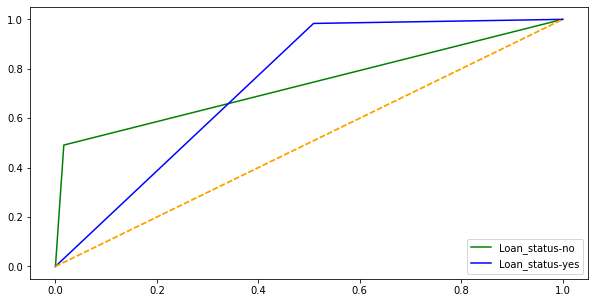

In [60]:
y_prob = cls.predict_proba(x_test)
fpr={}
tpr={}
thresh={}
for i in range(2):
    fpr[i],tpr[i],thresh[i]=metrics.roc_curve(y_test,y_prob[:,i],pos_label=i)
plt.figure(figsize=(10,5))
plt.plot(fpr[0],tpr[0],linestyle="-",color="green",label="Loan_status-no")
plt.plot(fpr[1],tpr[1],linestyle='-',color='blue',label='Loan_status-yes')
plt.plot([[0,0],[1,1]],linestyle='dashed',color='orange')
plt.legend(loc='lower right')
plt.show()